## Работа с датасетом MovieLens

In [313]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Данные

In [314]:
ratings_data = pd.read_csv('data/ml-1m/ratings.dat', sep='::', engine='python', \
                          names=['userId', 'movieId', 'rating', 'timestamp'])

ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [315]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
userId       1000209 non-null int64
movieId      1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [316]:
users_data = pd.read_csv('data/ml-1m/users.dat', sep='::', engine='python', \
                        names=['userId', 'gender', 'age', 'occupation', 'zip-code'])

users_data.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [317]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
userId        6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [318]:
movies_data = pd.read_csv('data/ml-1m/movies.dat', sep='::', engine='python', \
                         names=['movieId', 'title', 'genres'])

movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [319]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movieId    3883 non-null int64
title      3883 non-null object
genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [320]:
# объединение всех данных в одну таблицу
data = pd.merge(ratings_data, users_data, on='userId')
data = pd.merge(data, movies_data, on='movieId')

In [321]:
data.head()

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### EDA

#### 1. Оценить количество фильмов, пользователей и оценок

In [10]:
print('Количество оценок:', ratings_data.shape[0])
print('Количество фильмов:', movies_data.shape[0])
print('Количество пользователей:', users_data.shape[0])

Количество оценок: 1000209
Количество фильмов: 3883
Количество пользователей: 6040


#### 2. Оценить распределения (предлагается построить распределения количества оценок по фильмам и пользователям и увидеть т.н. "длинные хвосты" в распределениях)

In [322]:
most_rated_movies = data.groupby(by=['movieId', 'title']).size().reset_index()
most_rated_movies.columns = ['movieId', 'title', 'count']
most_rated_movies.sort_values(by='count', ascending=False, inplace=True)
most_rated_movies.head()

,movieId,title,count
2651,2858,American Beauty (1999),3428
253,260,Star Wars: Episode IV - A New Hope (1977),2991
1106,1196,Star Wars: Episode V - The Empire Strikes Back (1980),2990
1120,1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
466,480,Jurassic Park (1993),2672


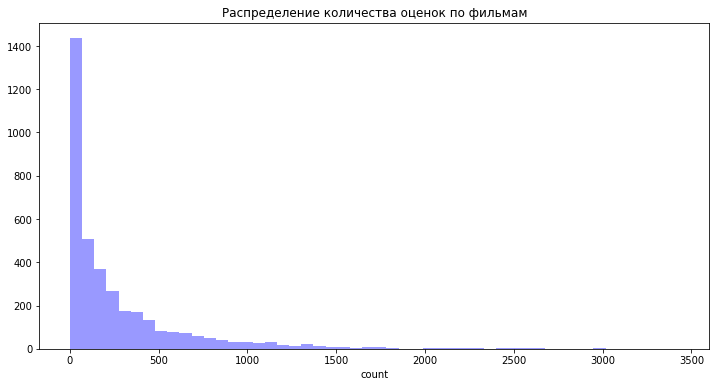

In [324]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(most_rated_movies['count'], color="b", kde=False)
ax.set_title('Распределение количества оценок по фильмам');

In [325]:
most_rated_users = data.groupby(by=['userId']).size().reset_index()
most_rated_users.columns = ['userId', 'count']
most_rated_users.sort_values(by='count', ascending=False, inplace=True)
most_rated_users.head(5)

,userId,count
4168,4169,2314
1679,1680,1850
4276,4277,1743
1940,1941,1595
1180,1181,1521


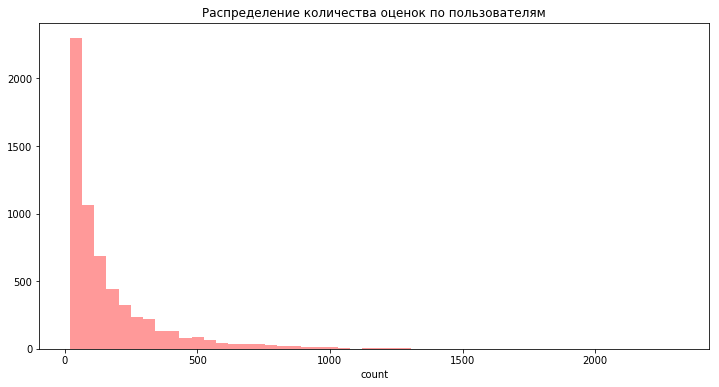

In [326]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(most_rated_users['count'], color="r", kde=False)
ax.set_title('Распределение количества оценок по пользователям');

Как и ожидали, у распределений длинные хвосты. Немного фильмов имеют большое количество оценок и чаще всего пользователи оценивают небольшое число фильмов. 

#### 3. Оценить средние оценки по фильмам и по пользователям

In [16]:
mean_rating_movies = data.groupby(by=['movieId', 'title'])['rating'].mean().reset_index()
mean_rating_movies.columns = ['movieId', 'title', 'rating']
mean_rating_movies.head(5)

,movieId,title,rating
0,1,Toy Story (1995),4.146846
1,2,Jumanji (1995),3.201141
2,3,Grumpier Old Men (1995),3.016736
3,4,Waiting to Exhale (1995),2.729412
4,5,Father of the Bride Part II (1995),3.006757


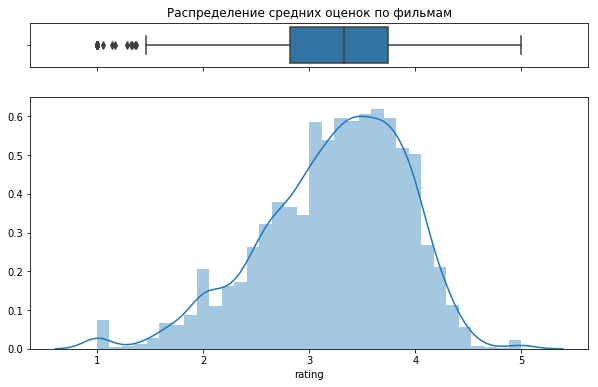

In [17]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), \
                                      gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(mean_rating_movies['rating'], ax=ax_box)
sns.distplot(mean_rating_movies['rating'], ax=ax_hist)
 
ax_box.set(xlabel='');
ax_box.set_title('Распределение средних оценок по фильмам');

Судя по графику, медиана распределения средних рейтингов фильмов где-то на 3.3. Есть какое увеличение числа фильмов с оценкой ниже 3. Также есть выбросы. Наверное, это какие-то очень плохие картины. 

In [36]:
mean_rating_users = data.groupby(by=['userId'])['rating'].mean().reset_index()
mean_rating_users.columns = ['userId', 'rating']
mean_rating_users.head(5)

,userId,rating
0,1,4.188679
1,2,3.713178
2,3,3.901961
3,4,4.190476
4,5,3.146465


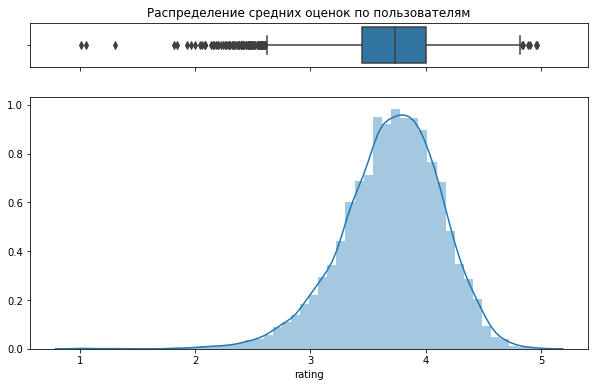

In [38]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6), \
                                      gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(mean_rating_users['rating'], ax=ax_box)
sns.distplot(mean_rating_users['rating'], ax=ax_hist)
 
ax_box.set(xlabel='');
ax_box.set_title('Распределение средних оценок по пользователям');

Здесь распределение очень похоже на нормальное. Вероятно, пользователи обычно ставят оценки от 3.5 до 4. Также очень много людей сильно занижающих оценки. 

#### 4. Выбрать критерий, показывающий, что фильм нравится всем, или не нравится никому, и вывести топ фильмов из этих списков. Знаете ли вы эти фильмы, согласны ли с оценками?

Я взяла формулу с сайта кинопоиска для расчета топ-250. В этой формуле учитывается минимальное количество голосов, необходимое для подсчета рейтинга. Таким образом, в рейтинг не попадут фильмы, например, с одной хорошей/плохой оценкой. 

$$Rating = \frac {V}{V+M} \cdot R + \frac{M}{V + M} \cdot C$$

**V** - количество голосов за фильм

**M** - порог голосов, необходимый для участия в рейтинге

**R** - среднее арифметическое всех голосов за фильм

**C** - среднее значение рейтинга всех фильмов

In [20]:
def rating_formula(V, R, M, C):
    return (V / (V + M) * R) + (M / (V + M) * C)

In [21]:
# среднее значение рейтинга всех фильмов
C = ratings_data['rating'].mean()
C

3.581564453029317

In [327]:
# порог голосов, необходимый для участия в рейтинге
M = 30

In [328]:
movies_rating = pd.merge(most_rated_movies, mean_rating_movies, on=['movieId', 'title'])
movies_rating = movies_rating[['movieId', 'title', 'count', 'rating']]
movies_rating = movies_rating[movies_rating['count'] > M]

In [329]:
movies_rating['rating_formula'] = rating_formula(V=movies_rating['count'], 
                                                 R=movies_rating['rating'], 
                                                 M=M, C=C)
movies_rating.sort_values(by='rating_formula', ascending=False, inplace=True)

Фильмы, которые нравятся всем: 

In [330]:
movies_rating.head(10)

,movieId,title,count,rating,rating_formula
23,318,"Shawshank Redemption, The (1994)",2227,4.554558,4.541625
470,2019,Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510,4.515877
24,858,"Godfather, The (1972)",2223,4.524966,4.512404
38,50,"Usual Suspects, The (1995)",1783,4.517106,4.501625
17,527,Schindler's List (1993),2304,4.510417,4.498478
443,745,"Close Shave, A (1995)",657,4.520548,4.479544
269,1148,"Wrong Trousers, The (1993)",882,4.507937,4.477464
11,1198,Raiders of the Lost Ark (1981),2514,4.477725,4.467157
186,904,Rear Window (1954),1050,4.476190,4.451340
1,260,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,4.445034


Фильмы, которые не нравятся никому:

In [332]:
movies_rating.tail(10)

,movieId,title,count,rating,rating_formula
1529,3268,Stop! Or My Mom Will Shoot (1992),179,1.782123,2.040416
967,2643,Superman IV: The Quest for Peace (1987),332,1.888554,2.028859
2019,2799,Problem Child 2 (1991),99,1.555556,2.026720
1847,2817,Aces: Iron Eagle III (1992),125,1.640000,2.015787
928,546,Super Mario Bros. (1993),350,1.874286,2.009071
874,1556,Speed 2: Cruise Control (1997),367,1.871935,2.001126
1611,2555,Baby Geniuses (1999),164,1.701220,1.991995
1684,2383,Police Academy 6: City Under Siege (1989),149,1.657718,1.980150
1876,810,Kazaam (1996),120,1.466667,1.889646
951,3593,Battlefield Earth (2000),342,1.611111,1.770019


#### 5. Выбрать лучшие фильмы

см. пункт выше

#### 6. Посмотреть на смещение оценок, увидеть сколько пользователей занижают оценки и завышают оценки.

У нас есть таблица с распределением средних оценок по пользователям. Можно посмотреть, сколько человек находятся за пределами плюс минус 0.5 от среднего этого распределения. 

In [337]:
mean_rating_users.head()

,userId,rating
0,1,4.188679
1,2,3.713178
2,3,3.901961
3,4,4.190476
4,5,3.146465


In [338]:
mean_ = mean_rating_users['rating'].mean()
mean_

3.702704866999724

In [344]:
low_value = mean_ - 0.5
up_value = mean_ + 0.5

print('Нижняя граница интервала:', low_value)
print('Верхняя граница интервала:', up_value)

Нижняя граница интервала: 3.202704866999724
Верхняя граница интервала: 4.202704866999724


In [345]:
print('Процент занижающих оценки: {} %'.\
      format(len(mean_rating_users[mean_rating_users.rating < low_value])/len(mean_rating_users)*100))

Процент занижающих оценки: 12.036423841059603 %


In [346]:
print('Процент завышающих оценки: {} %'.\
      format(len(mean_rating_users[mean_rating_users.rating > up_value])/len(mean_rating_users)*100))

Процент завышающих оценки: 10.645695364238412 %


#### 7. Построить рекомендательную систему с помощью библиотеки surprise (или другой, по желанию). Применить подбор параметров модели на сетке, оценить качество полученной модели по выбранной вами метрике. 

In [68]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import Reader, Dataset

In [73]:
df = data[['userId', 'movieId', 'rating']]

In [78]:
reader = Reader(rating_scale=(1, 5))

data_surprise = Dataset.load_from_df(df, reader)

In [82]:
%%time
param_grid = {
    'lr_all': [0.005, 0.05],
    'reg_all': [0.02, 0.002],
    'n_factors': [5, 10, 100, 250],
    'n_epochs': [5, 10, 100]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
gs.fit(data_surprise)

CPU times: user 1h 6min 25s, sys: 34.8 s, total: 1h 7min
Wall time: 1h 49min 32s


In [83]:
print(gs.best_score['rmse'])

0.868811260453826


In [84]:
gs.best_params['rmse']

{'lr_all': 0.005, 'reg_all': 0.02, 'n_factors': 5, 'n_epochs': 100}

In [85]:
model = gs.best_estimator['rmse']

In [87]:
model.fit(data_surprise.build_full_trainset())

#### 8. Получить рекомендации для нового пользователя, совпадают ли они с лучшими фильмами?

In [273]:
NEW_USER_ID = 9999

In [274]:
NEW_USER_ID in users_data['userId'].values

False

In [275]:
def get_recommendations(model, movies_data, user_id, user_ratings):
    recommends = {}

    for movie_id in movies_data['movieId'].values:
        rating = model.predict(user_id, movie_id).est
        recommends[movie_id] = rating
        
    recommends = sorted(recommends.items(), key=lambda x:x[1], reverse=True)
    recommends = pd.DataFrame({'movieId': [r[0] for r in recommends], \
                           'rating': [r[1] for r in recommends]})
    recommends = pd.merge(recommends, movies_data, on='movieId')
    
    # удалить из рекомендаций просмотренные фильмы
    drop_movies = list(user_ratings.keys())
    for movieId in drop_movies:
        recommends.drop(recommends[recommends['movieId'] == movieId].index, inplace=True)
        
    return recommends

Рекомендации без оценок от нового пользователя: 

In [276]:
recommends = get_recommendations(model, movies_data, NEW_USER_ID, {})
recommends.head(10)

,movieId,rating,title,genres
0,53,4.605116,Lamerica (1994),Drama
1,2503,4.601622,"Apple, The (Sib) (1998)",Drama
2,2905,4.598855,Sanjuro (1962),Action|Adventure
3,3382,4.574343,Song of Freedom (1936),Drama
4,318,4.553291,"Shawshank Redemption, The (1994)",Drama
5,3245,4.500892,I Am Cuba (Soy Cuba/Ya Kuba) (1964),Drama
6,50,4.467360,"Usual Suspects, The (1995)",Crime|Thriller
7,787,4.443642,"Gate of Heavenly Peace, The (1995)",Documentary
8,3338,4.440090,For All Mankind (1989),Documentary
9,2019,4.418471,Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),Action|Drama


Лучшие фильмы по формуле:

In [277]:
movies_rating.head(10)

,movieId,title,count,rating,rating_formula
23,318,"Shawshank Redemption, The (1994)",2227,4.554558,4.540350
470,2019,Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510,4.511636
24,858,"Godfather, The (1972)",2223,4.524966,4.511167
38,50,"Usual Suspects, The (1995)",1783,4.517106,4.500106
17,527,Schindler's List (1993),2304,4.510417,4.497301
443,745,"Close Shave, A (1995)",657,4.520548,4.475640
269,1148,"Wrong Trousers, The (1993)",882,4.507937,4.474526
11,1198,Raiders of the Lost Ark (1981),2514,4.477725,4.466114
186,904,Rear Window (1954),1050,4.476190,4.448930
1,260,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,4.444177


In [278]:
set.intersection(set(movies_rating.head(10)['movieId'].values), \
                 set(recommends.head(10)['movieId'].values))

{50, 318, 2019}

Как видим, перечений немного - 3 довольно известных фильма. Мне кажется, что на "холодном старте" лучше выглядят фильмы, рейтинг которых посчитан по формуле.

#### 9. Поставьте оценку какому-нибудь фильму (который вы знаете и можете поставить оценку) и получите рекомендации, насколько они качественные по вашим ощущениям? Сделайте это для фильма с негативной оценкой и для фильма с позитивной оценкой.

Добавим нового пользователя в таблицу: 

In [279]:
new_user = pd.DataFrame([[NEW_USER_ID, 'F', 30, 12, 12345]],
                        columns=['userId', 'gender', 'age', 'occupation', 'zip-code'])

In [280]:
users_data = users_data.append(new_user, ignore_index=True)
users_data.tail(2)

,userId,gender,age,occupation,zip-code
6039,6040,M,25,6,11106
6040,9999,F,30,12,12345


Сделаем 1 хорошую оценку и 1 плохую: 

In [281]:
# 356: Forrest Gump (1994) -- 5
# 1921: Pi (1998) -- 3
new_user_ratings = {356: 5, 1921: 3}

In [282]:
def add_ratings(ratings_data, userId, ratings):
    for movieId, rating in ratings.items():
        ratings_data = ratings_data.append({'userId': userId, 'movieId': movieId, \
                                            'rating': rating, 'timestamp': 956715569}, ignore_index=True)
        
    return ratings_data

In [283]:
ratings_data.tail(3)

,userId,movieId,rating,timestamp
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [284]:
ratings_data = add_ratings(ratings_data, NEW_USER_ID, new_user_ratings)
ratings_data.tail(3)

,userId,movieId,rating,timestamp
1000208,6040,1097,4,956715569
1000209,9999,356,5,956715569
1000210,9999,1921,3,956715569


In [285]:
data = pd.merge(ratings_data, users_data, on='userId')
data = pd.merge(data, movies_data, on='movieId')

In [286]:
data[data.userId == NEW_USER_ID]

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres
180020,9999,356,5,956715569,F,30,12,12345,Forrest Gump (1994),Comedy|Romance|War
271086,9999,1921,3,956715569,F,30,12,12345,Pi (1998),Sci-Fi|Thriller


Пересчет модели с новыми данными: 

In [287]:
df = data[['userId', 'movieId', 'rating']]

reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(df, reader)

In [288]:
%%time
new_model = SVD(**gs.best_params['rmse'])
trainset = data_surprise.build_full_trainset()
new_model.fit(trainset)

CPU times: user 1min 48s, sys: 101 ms, total: 1min 49s
Wall time: 1min 49s


In [290]:
new_recommends = get_recommendations(new_model, movies_data, NEW_USER_ID, new_user_ratings)
new_recommends.head(15)

,movieId,rating,title,genres
0,318,4.890817,"Shawshank Redemption, The (1994)",Drama
1,2762,4.744239,"Sixth Sense, The (1999)",Thriller
2,527,4.708529,Schindler's List (1993),Drama|War
3,1198,4.696609,Raiders of the Lost Ark (1981),Action|Adventure
4,2905,4.687569,Sanjuro (1962),Action|Adventure
5,3382,4.669882,Song of Freedom (1936),Drama
6,2503,4.648253,"Apple, The (Sib) (1998)",Drama
7,953,4.641022,It's a Wonderful Life (1946),Drama
8,2028,4.627912,Saving Private Ryan (1998),Action|Drama|War
9,593,4.610003,"Silence of the Lambs, The (1991)",Drama|Thriller


Такие рекомендации мне нравятся больше, чем те, которые модель выдавала по умолчанию.

#### 10. Добавляйте оценки и посмотрите, как изменяются рекомендации фильмов. Соответствуют ли они вашим предпочтениям? Есть ли недостатки у системы? Сколько нужно оценок для того, чтобы рекомендации стали релевантными? (в этом пункте добавляйте оценки в том числе из интересного вам жанра для пункта 11)

В качестве интересного жанра я выбрала Thriller. Помимо фильмов других жанров, я добавила триллеры с разными оценками.

In [ ]:
# 1270: Back to the Future (1985)         -- 3
# 589: Terminator 2: Judgment Day (1991)  -- 3
# 608: Fargo (1996)                       -- 4
# 2762: Sixth Sense, The (1999)           -- 4
# 1240: Terminator, The (1984)            -- 4
# 1721: Titanic (1997)                    -- 3
# 648: Mission: Impossible (1996)         -- 3
# 2959: Fight Club (1999)                 -- 4
# 1961: Rain Man (1988)                   -- 5
# 1219: Psycho (1960)                     -- 4
# 1208: Apocalypse Now (1979)             -- 5
# 47: Seven (Se7en) (1995)                -- 5
# 1214: Alien (1979)                      -- 5
# 1917: Armageddon (1998)                 -- 4

In [293]:
new_user_ratings = {1270: 3, 
                    589: 3, 
                    608: 4, 
                    2762: 4, 
                    1240: 4, 
                    1721: 3, 
                    648: 3, 
                    2959: 4, 
                    1961: 5, 
                    1219: 4, 
                    1208: 5, 
                    47: 5, 
                    1214: 5, 
                    1917: 4}

In [294]:
ratings_data = add_ratings(ratings_data, NEW_USER_ID, new_user_ratings)

In [295]:
data = pd.merge(ratings_data, users_data, on='userId')
data = pd.merge(data, movies_data, on='movieId')

In [296]:
data[data.userId == NEW_USER_ID]

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres
25853,9999,1270,3,956715569,F,30,12,12345,Back to the Future (1985),Comedy|Sci-Fi
32699,9999,1721,3,956715569,F,30,12,12345,Titanic (1997),Drama|Romance
40377,9999,2762,4,956715569,F,30,12,12345,"Sixth Sense, The (1999)",Thriller
45036,9999,1961,5,956715569,F,30,12,12345,Rain Man (1988),Drama
59348,9999,608,4,956715569,F,30,12,12345,Fargo (1996),Crime|Drama|Thriller
64576,9999,648,3,956715569,F,30,12,12345,Mission: Impossible (1996),Action|Adventure|Mystery
104711,9999,589,3,956715569,F,30,12,12345,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
144112,9999,1917,4,956715569,F,30,12,12345,Armageddon (1998),Action|Adventure|Sci-Fi|Thriller
180028,9999,356,5,956715569,F,30,12,12345,Forrest Gump (1994),Comedy|Romance|War
215831,9999,1214,5,956715569,F,30,12,12345,Alien (1979),Action|Horror|Sci-Fi|Thriller


In [297]:
df = data[['userId', 'movieId', 'rating']]

reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(df, reader)

In [298]:
%%time
new_model = SVD(**gs.best_params['rmse'])
trainset = data_surprise.build_full_trainset()
new_model.fit(trainset)

CPU times: user 1min 48s, sys: 13.5 ms, total: 1min 48s
Wall time: 1min 48s


In [300]:
# с пред. пункта
new_user_ratings.update({356: 5, 1921: 3})

In [302]:
new_recommends = get_recommendations(new_model, movies_data, NEW_USER_ID, new_user_ratings)
new_recommends.head(15)

,movieId,rating,title,genres
0,53,4.743062,Lamerica (1994),Drama
1,2503,4.741627,"Apple, The (Sib) (1998)",Drama
2,593,4.649112,"Silence of the Lambs, The (1991)",Drama|Thriller
3,318,4.640390,"Shawshank Redemption, The (1994)",Drama
4,3245,4.579992,I Am Cuba (Soy Cuba/Ya Kuba) (1964),Drama
5,858,4.578545,"Godfather, The (1972)",Action|Crime|Drama
6,1263,4.573457,"Deer Hunter, The (1978)",Drama|War
7,3222,4.544237,Carmen (1984),Drama
8,787,4.523597,"Gate of Heavenly Peace, The (1995)",Documentary
9,557,4.518807,Mamma Roma (1962),Drama


В рекомендацих появилось почему-то много драм. Модель не учла мой интерес к различным триллерам. Может быть далеко не всегда хорошие оценки этих триллеров влияют на рекомендации этой модели. 

#### 11. Построить рекомендательную систему по подвыборке - выбрать интересный вам жанр. Изменились ли рекомендации? Стали лучше\хуже?

In [303]:
movies_data_thriller = movies_data[movies_data['genres'].str.contains('Thriller')]

In [304]:
movies_data_thriller.head()

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
9,10,GoldenEye (1995),Action|Adventure|Thriller
15,16,Casino (1995),Drama|Thriller
17,18,Four Rooms (1995),Thriller
21,22,Copycat (1995),Crime|Drama|Thriller


In [305]:
data.head()

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [307]:
data_thriller = data[data.movieId.isin(movies_data_thriller['movieId'].values)]
data_thriller.shape

(189689, 10)

In [309]:
data_thriller[data_thriller.userId == NEW_USER_ID]

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres
40377,9999,2762,4,956715569,F,30,12,12345,"Sixth Sense, The (1999)",Thriller
59348,9999,608,4,956715569,F,30,12,12345,Fargo (1996),Crime|Drama|Thriller
104711,9999,589,3,956715569,F,30,12,12345,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
144112,9999,1917,4,956715569,F,30,12,12345,Armageddon (1998),Action|Adventure|Sci-Fi|Thriller
215831,9999,1214,5,956715569,F,30,12,12345,Alien (1979),Action|Horror|Sci-Fi|Thriller
226131,9999,1240,4,956715569,F,30,12,12345,"Terminator, The (1984)",Action|Sci-Fi|Thriller
239653,9999,47,5,956715569,F,30,12,12345,Seven (Se7en) (1995),Crime|Thriller
271097,9999,1921,3,956715569,F,30,12,12345,Pi (1998),Sci-Fi|Thriller
705437,9999,1219,4,956715569,F,30,12,12345,Psycho (1960),Horror|Thriller


In [310]:
df = data_thriller[['userId', 'movieId', 'rating']]

reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(df, reader)

In [311]:
%%time
new_model = SVD(**gs.best_params['rmse'])
trainset = data_surprise.build_full_trainset()
new_model.fit(trainset)

CPU times: user 20.3 s, sys: 20.2 ms, total: 20.3 s
Wall time: 20.3 s


In [312]:
new_recommends = get_recommendations(new_model, movies_data, NEW_USER_ID, new_user_ratings)
new_recommends.head(15)

,movieId,rating,title,genres
0,745,4.537979,"Close Shave, A (1995)",Animation|Comedy|Thriller
2,3147,4.530248,"Green Mile, The (1999)",Drama|Thriller
3,904,4.465335,Rear Window (1954),Mystery|Thriller
4,593,4.427932,"Silence of the Lambs, The (1991)",Drama|Thriller
5,50,4.355493,"Usual Suspects, The (1995)",Crime|Thriller
6,1269,4.342439,Arsenic and Old Lace (1944),Comedy|Mystery|Thriller
7,1212,4.313266,"Third Man, The (1949)",Mystery|Thriller
8,908,4.299836,North by Northwest (1959),Drama|Thriller
9,930,4.282549,Notorious (1946),Film-Noir|Romance|Thriller
10,1674,4.239309,Witness (1985),Drama|Romance|Thriller


Список рекомендаций, конечно, изменился. Фильмов, которые мне нравятся стало больше. Однако многие из непросмотренных я скорее всего никогда не посмотрю, так как они очень давно вышли. То есть рекомендации были бы намного точнее, если бы модель учитывала год выхода фильма, актеров, перечение жанров и т.д. Возможно, была бы полезной информация о пользователях: пол, возраст, текст отзывов (при наличии).